In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [90]:
# Seleccionamos HISTORIC DATA 2019 ELECTROLINERES AMB.csv porque Charge2019_EV_AMB.csv no tiene la hora
Bcn_data = pd.read_csv("HISTORIC DATA 2019 ELECTROLINERES AMB.csv", encoding='latin-1',sep=";")
Bcn_data.columns

Index(['CHARGING POINT', 'CONNECTOR', 'START TIME', 'STOP TIME',
       'DURATION (min)', 'CONSUMPTION (kWh)', 'VEHICLE', 'MODEL'],
      dtype='object')

In [91]:
# Número de datos
print(f"Número de cargas (antes de limpiar): {len(Bcn_data)}")

# Número de electrolineras
print(f"Número de electrolineras: {len(Bcn_data['CHARGING POINT'].unique())}")

Número de cargas (antes de limpiar): 38219
Número de electrolineras: 21


In [92]:
# Seleccionamos solo algunas columnas
Bcn_data = Bcn_data[['CHARGING POINT','START TIME',"STOP TIME",'DURATION (min)','CONSUMPTION (kWh)']]
Bcn_data = Bcn_data.rename(columns={"CHARGING POINT": "Station", "START TIME": "Start",
                                    "STOP TIME": "Stop",
                                              "CONSUMPTION (kWh)": "Energy", "DURATION (min)": "Duration (min)"})
Bcn_data.head()

,Station,Start,Stop,Duration (min),Energy
0,PdRL L'Hospitalet de Ll.: C. Salvador Espriu -...,28/07/2019 11.25,08/08/2019 08.59,15695,0.0
1,PdRL L'Hospitalet de Ll.: C. Salvador Espriu -...,21/07/2019 11.54,24/07/2019 07.25,4052,0.0
2,PdRR Badalona: C. Anna Tugas - Pg. Olof Palmer,17/10/2019 09.08,18/10/2019 06.53,1306,0.0
3,PdRR Sant Joan Despi: C. TV3 - C. Jacint Verda...,29/09/2019 22.15,30/09/2019 11.06,772,0.0
4,PdRR Pallejà: Rda. Santa Eulalia - C. Joan Mar...,16/05/2019 20.32,17/05/2019 07.50,679,0.0


In [93]:
# Eliminamos los 0s
Bcn_data = Bcn_data[Bcn_data['Energy'] != 0]
Bcn_data.head()

,Station,Start,Stop,Duration (min),Energy
1806,FLNR Sant Andreu da la Barca: Pg. Rafael de Ca...,18/09/2019 17.05,18/09/2019 19.27,143,0.008
1807,FLNR Sant Andreu da la Barca: Pg. Rafael de Ca...,08/05/2019 16.07,08/05/2019 16.20,14,0.009
1808,PdRL Sant Joan Despí: C. TV3 - C. Jacint Verda...,12/11/2019 08.14,12/11/2019 12.10,237,0.010
1809,PdRL Sant Joan Despí: C. TV3 - C. Jacint Verda...,04/11/2019 10.54,04/11/2019 14.33,220,0.010
1810,"PdRL Gavà: C. del Progres, 54",15/03/2019 17.22,15/03/2019 20.21,180,0.010


In [94]:
# Número de datos
print(f"Número de cargas (después de limpiar): {len(Bcn_data)}")

# Número de electrolineras
print(f"Número de electrolineras: {len(Bcn_data['Station'].unique())}")

Número de cargas (después de limpiar): 36413
Número de electrolineras: 21


In [95]:
# Convertimos fecha en datetime
Bcn_data['Start'] = pd.to_datetime(Bcn_data['Start'], format="%d/%m/%Y %H.%M")  
Bcn_data['Stop'] = pd.to_datetime(Bcn_data['Stop'], format="%d/%m/%Y %H.%M") 

# Pasamos de %H:%M:%S a segundos
Bcn_data['Duration'] = Bcn_data['Duration (min)'] * 60
Bcn_data = Bcn_data.drop(columns=["Duration (min)"])

# Reordenamos índices
Bcn_data = Bcn_data.sort_values(by="Start").reset_index(drop=True)

Bcn_data.head()

,Station,Start,Stop,Energy,Duration
0,"PdRR Gavà: C. del Progres, 54",2018-12-31 00:35:00,2018-12-31 00:53:00,6.4,1140
1,"PdRR Sant Cugat del Vallès: Av. Via Augusta, 3",2018-12-31 01:21:00,2018-12-31 01:38:00,10.5,1080
2,PdRR Sant Joan Despi: C. TV3 - C. Jacint Verda...,2018-12-31 01:34:00,2018-12-31 02:03:00,14.5,1800
3,PdRR El Prat de Llobregat: Pl. Volateria (Mas ...,2018-12-31 05:46:00,2018-12-31 06:37:00,16.8,3120
4,PdRR Sant Joan Despi: C. TV3 - C. Jacint Verda...,2018-12-31 05:55:00,2018-12-31 06:18:00,9.1,1440


In [96]:
Bcn_data['Duration check'] = pd.to_timedelta(Bcn_data['Stop'] - Bcn_data['Start']).apply(pd.Timedelta.total_seconds)

In [97]:
Bcn_data

,Station,Start,Stop,Energy,Duration,Duration check
0,"PdRR Gavà: C. del Progres, 54",2018-12-31 00:35:00,2018-12-31 00:53:00,6.4,1140,1080.0
1,"PdRR Sant Cugat del Vallès: Av. Via Augusta, 3",2018-12-31 01:21:00,2018-12-31 01:38:00,10.5,1080,1020.0
2,PdRR Sant Joan Despi: C. TV3 - C. Jacint Verda...,2018-12-31 01:34:00,2018-12-31 02:03:00,14.5,1800,1740.0
3,PdRR El Prat de Llobregat: Pl. Volateria (Mas ...,2018-12-31 05:46:00,2018-12-31 06:37:00,16.8,3120,3060.0
4,PdRR Sant Joan Despi: C. TV3 - C. Jacint Verda...,2018-12-31 05:55:00,2018-12-31 06:18:00,9.1,1440,1380.0
...,...,...,...,...,...,...
36408,PdRR El Prat de Llobregat: Pl. Volateria (Mas ...,2019-12-31 20:14:00,2019-12-31 20:20:00,1.7,420,360.0
36409,"PdRR Gavà: C. del Progres, 54",2019-12-31 20:18:00,2019-12-31 20:58:00,20.4,2460,2400.0
36410,PdRR El Prat de Llobregat: Pl. Volateria (Mas ...,2019-12-31 20:35:00,2019-12-31 20:52:00,5.2,1080,1020.0
36411,PdRR l'Hospitalet de Ll.: C. Salvador Espriu -...,2019-12-31 21:25:00,2019-12-31 21:53:00,17.0,1740,1680.0


In [99]:
Bcn_data = Bcn_data[Bcn_data['Duration'] < 1.5e5]

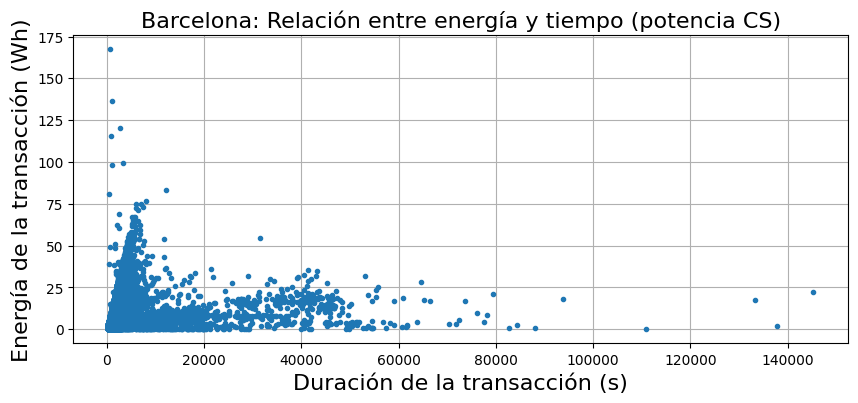

In [100]:
plt.figure(figsize=(10,4))
plt.plot(Bcn_data['Duration'],Bcn_data['Energy'],'.')
plt.title("Barcelona: Relación entre energía y tiempo (potencia CS)", size = 16)
plt.ylabel("Energía de la transacción (Wh)", size = 16)
plt.xlabel("Duración de la transacción (s)", size = 16)
plt.grid()
plt.show()

In [105]:
Bcn_data["Power"] = round(Bcn_data["Energy"]/Bcn_data["Duration"], 5) # Wh/s

/var/folders/b_/0wttc4ks4h3bgdql8lyklvsm0000gn/T/ipykernel_92824/3100401261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bcn_data["Power"] = round(Bcn_data["Energy"]/Bcn_data["Duration"], 5) # Wh/s


In [106]:
Bcn_data

,Station,Start,Stop,Energy,Duration,Duration check,Power
0,"PdRR Gavà: C. del Progres, 54",2018-12-31 00:35:00,2018-12-31 00:53:00,6.4,1140,1080.0,0.00561
1,"PdRR Sant Cugat del Vallès: Av. Via Augusta, 3",2018-12-31 01:21:00,2018-12-31 01:38:00,10.5,1080,1020.0,0.00972
2,PdRR Sant Joan Despi: C. TV3 - C. Jacint Verda...,2018-12-31 01:34:00,2018-12-31 02:03:00,14.5,1800,1740.0,0.00806
3,PdRR El Prat de Llobregat: Pl. Volateria (Mas ...,2018-12-31 05:46:00,2018-12-31 06:37:00,16.8,3120,3060.0,0.00538
4,PdRR Sant Joan Despi: C. TV3 - C. Jacint Verda...,2018-12-31 05:55:00,2018-12-31 06:18:00,9.1,1440,1380.0,0.00632
...,...,...,...,...,...,...,...
36408,PdRR El Prat de Llobregat: Pl. Volateria (Mas ...,2019-12-31 20:14:00,2019-12-31 20:20:00,1.7,420,360.0,0.00405
36409,"PdRR Gavà: C. del Progres, 54",2019-12-31 20:18:00,2019-12-31 20:58:00,20.4,2460,2400.0,0.00829
36410,PdRR El Prat de Llobregat: Pl. Volateria (Mas ...,2019-12-31 20:35:00,2019-12-31 20:52:00,5.2,1080,1020.0,0.00481
36411,PdRR l'Hospitalet de Ll.: C. Salvador Espriu -...,2019-12-31 21:25:00,2019-12-31 21:53:00,17.0,1740,1680.0,0.00977


In [111]:
# Creamos una serie con todos los instantes de tiempo (cada segundo) de todo el mes
start = pd.Timestamp('2018-12-31 00:00:00')
end = pd.Timestamp('2019-12-31 23:59:59')
Bcn_all_secs = pd.period_range(start=start, end=end, freq='s').to_timestamp()

Bcn_stations = Bcn_data['Station'].unique()
print(f"Number of Stations: {len(Bcn_stations)}")

Number of Stations: 21


In [112]:
# Creamos el dataset con la potencia de la estación en cada momento del tiempo
Bcn_cont = pd.DataFrame(index=Bcn_all_secs)

# Por cada estación
for stat in Bcn_stations:
    print(stat)
    new_column_name = 'Power_' +stat 
    Bcn_cont[new_column_name] = 0
    
    # Llenamos el dataset con la información de las recargas
    for charge in Bcn_data[Bcn_data['Station']==stat].itertuples():
        start = charge.Start
        end = start + pd.DateOffset(seconds=charge.Duration)
        
        Bcn_cont.loc[start:end, new_column_name] += charge.Power

PdRR Gavà: C. del Progres, 54
PdRR Sant Cugat del Vallès: Av. Via Augusta, 3
PdRR Sant Joan Despi: C. TV3 - C. Jacint Verdaguer
PdRR El Prat de Llobregat: Pl. Volateria (Mas Blau)
PdRR Pallejà: Rda. Santa Eulalia - C. Joan Maragall
PdRR Barberà del Vallés: C. Arquímedes, 8
PdRR l'Hospitalet de Ll.: C. Salvador Espriu - Gran Via de les Corts Catalanes
PdRL Sant Joan Despí: C. TV3 - C. Jacint Verdaguer
PdRR Cornellà de Llobregat: Carrer de Baltasar Oriol i Mercer
PdRR Badalona: C. Anna Tugas - Pg. Olof Palmer
PdRL Pallejà: Rda. Santa Eulalia - C. Joan Maragall
PdRL Badalona: C. Anna Tugas - Pg. Olof Palmer
PdRR Montcada i Reixac: C. Tarragona - C. Pla de Matabous
PdRL Cornellà de Llobregat: Carrer de Baltasar Oriol i Mercer
PdRL Gavà: C. del Progres, 54
PdRL Montcada i Reixac: C. Tarragona - C. Pla de Matabous
PdRL L'Hospitalet de Ll.: C. Salvador Espriu - Gran Via de les Corts Catalanes
PdRL Sant Cugat del Vallès: Av. Via Augusta, 3
PdRL El Prat de Llobregat: Pl. Volateria (Mas Blau)
Pd

In [114]:
def plotTimeInterval(data, stations_plot, days_start=1, days_end=30, ylabel="Energy per period (Wh/period)"):

    plt.figure(figsize=(10,4))
    for stat in stations_plot:
        column_name = 'Power_'+stat
        
        start = data.index[0] + pd.DateOffset(days=days_start-1)
        end = start + pd.DateOffset(days=days_end-1)
        plt.plot(data.loc[start:end].index, data.loc[start:end][column_name])
    plt.title(f"Energy supply between day {days_start} and day {days_end}", size = 18)
    plt.ylabel(ylabel, size = 12)
    plt.xlabel("Time", size = 12)
    plt.legend(stations_plot)
    plt.show()

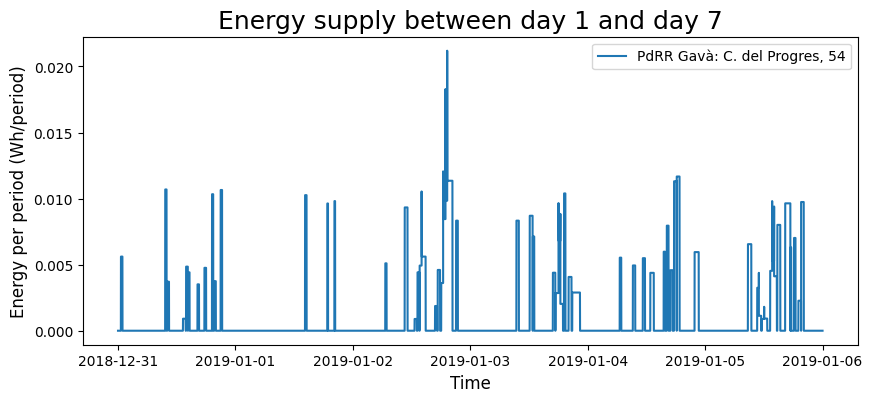

In [171]:
plotTimeInterval(Bcn_cont, Bcn_stations[0:1], days_start=1, days_end=7)

In [116]:
Bcn_1d = Bcn_cont.groupby(pd.Grouper(freq='1D')).sum()
Bcn_1d

,"Power_PdRR Gavà: C. del Progres, 54","Power_PdRR Sant Cugat del Vallès: Av. Via Augusta, 3",Power_PdRR Sant Joan Despi: C. TV3 - C. Jacint Verdaguer,Power_PdRR El Prat de Llobregat: Pl. Volateria (Mas Blau),Power_PdRR Pallejà: Rda. Santa Eulalia - C. Joan Maragall,"Power_PdRR Barberà del Vallés: C. Arquímedes, 8",Power_PdRR l'Hospitalet de Ll.: C. Salvador Espriu - Gran Via de les Corts Catalanes,Power_PdRL Sant Joan Despí: C. TV3 - C. Jacint Verdaguer,Power_PdRR Cornellà de Llobregat: Carrer de Baltasar Oriol i Mercer,Power_PdRR Badalona: C. Anna Tugas - Pg. Olof Palmer,...,Power_PdRL Badalona: C. Anna Tugas - Pg. Olof Palmer,Power_PdRR Montcada i Reixac: C. Tarragona - C. Pla de Matabous,Power_PdRL Cornellà de Llobregat: Carrer de Baltasar Oriol i Mercer,"Power_PdRL Gavà: C. del Progres, 54",Power_PdRL Montcada i Reixac: C. Tarragona - C. Pla de Matabous,Power_PdRL L'Hospitalet de Ll.: C. Salvador Espriu - Gran Via de les Corts Catalanes,"Power_PdRL Sant Cugat del Vallès: Av. Via Augusta, 3",Power_PdRL El Prat de Llobregat: Pl. Volateria (Mas Blau),"Power_PdRL Barberà del Vallés: C. Arquímedes, 8",Power_FLNR Sant Andreu da la Barca: Pg. Rafael de Casanova FGC
2018-12-31,71.06539,60.19340,69.47640,51.92112,59.65168,98.84481,102.86211,3.28808,49.22731,82.88028,...,2.80840,36.21801,3.88169,3.12654,0.00000,0.00000,0.00000,0.0,0.00000,0.00000
2019-01-01,22.22370,111.50907,13.41140,40.42653,10.41118,36.30267,29.20819,0.06360,65.23923,50.54194,...,0.00000,27.62755,0.10820,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000
2019-01-02,153.73893,98.36614,47.03791,96.16173,77.66373,92.32145,79.84182,2.77335,86.35491,75.04165,...,6.08629,8.10500,2.97046,7.53601,0.03913,0.00000,0.00000,0.0,0.00000,0.00000
2019-01-03,105.10139,108.10219,23.82128,41.59433,24.22446,108.06780,82.01153,6.76596,71.41906,52.43405,...,6.29394,32.91829,8.72967,5.70720,1.67321,9.20336,0.00000,0.0,0.00000,0.00000
2019-01-04,123.85738,102.60822,117.72284,105.86494,83.96846,68.24897,59.93000,2.83507,93.57733,68.36209,...,4.33496,17.70696,0.00000,25.40989,1.14296,1.20893,0.00000,0.0,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,276.27191,195.79574,127.18596,174.45392,54.63347,47.05351,229.24926,3.36766,228.67592,0.00000,...,3.68983,63.52361,2.38313,6.26134,7.31745,0.00000,0.00000,0.0,0.00000,57.60022
2019-12-28,184.27634,110.95747,98.87187,91.76317,140.68259,21.91555,122.77081,2.44800,106.55463,0.00000,...,1.36860,13.10973,0.74715,6.53908,0.00000,1.39453,0.00000,0.0,0.00000,12.96000
2019-12-29,187.33598,211.04449,82.34872,140.45581,87.55853,10.42136,116.18676,44.27179,61.63482,0.00000,...,0.00000,13.41627,0.00000,3.19238,0.00000,0.00000,1.24620,0.0,0.00000,15.19132
2019-12-30,180.57056,171.16257,168.39995,187.59901,60.13710,13.62829,242.93824,10.58783,148.37408,0.00000,...,0.00000,83.42613,4.59254,28.37443,5.49172,0.00000,0.13051,0.0,0.00000,7.50120


In [118]:
means = Bcn_1d.mean().sort_index()
means.index =  means.index.str.replace('Power_','')
color = ['b' if x.startswith('PdRL') else 'r' if x.startswith('PdRR') else 'g' for x in means.index]
means

FLNR Sant Andreu da la Barca: Pg. Rafael de Casanova FGC                            7.703881
PdRL Badalona: C. Anna Tugas - Pg. Olof Palmer                                      2.468717
PdRL Barberà del Vallés: C. Arquímedes, 8                                           0.560184
PdRL Cornellà de Llobregat: Carrer de Baltasar Oriol i Mercer                       1.962850
PdRL El Prat de Llobregat: Pl. Volateria (Mas Blau)                                 0.379766
PdRL Gavà: C. del Progres, 54                                                       8.363667
PdRL L'Hospitalet de Ll.: C. Salvador Espriu - Gran Via de les Corts Catalanes      2.338971
PdRL Montcada i Reixac: C. Tarragona - C. Pla de Matabous                           1.488709
PdRL Pallejà: Rda. Santa Eulalia - C. Joan Maragall                                 3.485672
PdRL Sant Cugat del Vallès: Av. Via Augusta, 3                                      2.956779
PdRL Sant Joan Despí: C. TV3 - C. Jacint Verdaguer                    

<BarContainer object of 21 artists>

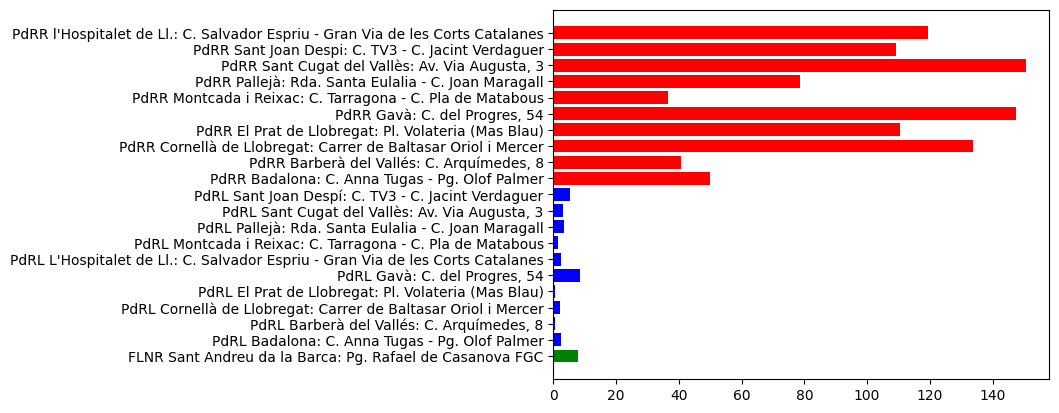

In [120]:
plt.barh(means.index, means.values, color=color)

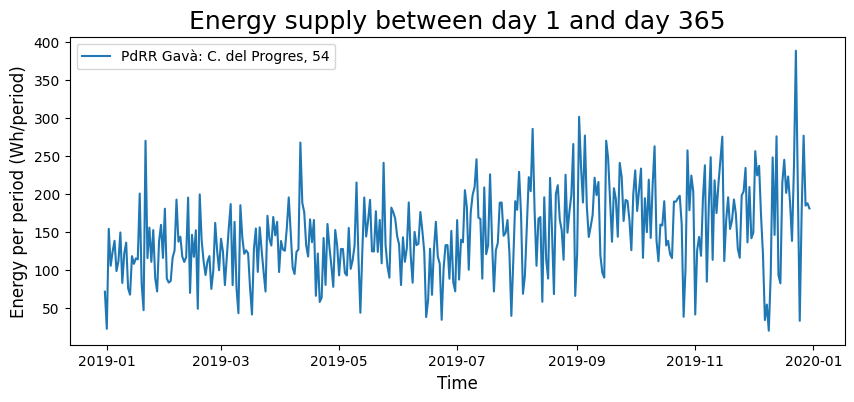

In [119]:
plotTimeInterval(Bcn_1d, Bcn_stations[[0]], days_start=1, days_end=365)

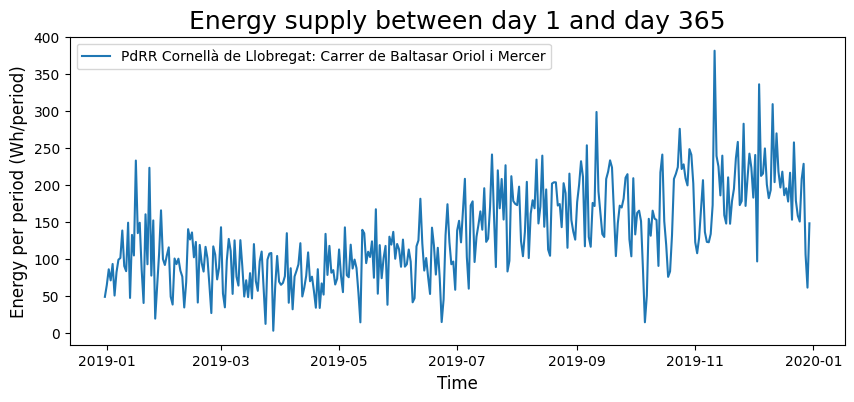

In [123]:
plotTimeInterval(Bcn_1d, ['PdRR Cornellà de Llobregat: Carrer de Baltasar Oriol i Mercer'], days_start=1, days_end=365)

In [124]:
# Modificar para guardar
Bcn_1d_tosave = Bcn_1d.reset_index(inplace=False, names=['Time'])
Bcn_1d_tosave.head(3)

,Time,"Power_PdRR Gavà: C. del Progres, 54","Power_PdRR Sant Cugat del Vallès: Av. Via Augusta, 3",Power_PdRR Sant Joan Despi: C. TV3 - C. Jacint Verdaguer,Power_PdRR El Prat de Llobregat: Pl. Volateria (Mas Blau),Power_PdRR Pallejà: Rda. Santa Eulalia - C. Joan Maragall,"Power_PdRR Barberà del Vallés: C. Arquímedes, 8",Power_PdRR l'Hospitalet de Ll.: C. Salvador Espriu - Gran Via de les Corts Catalanes,Power_PdRL Sant Joan Despí: C. TV3 - C. Jacint Verdaguer,Power_PdRR Cornellà de Llobregat: Carrer de Baltasar Oriol i Mercer,...,Power_PdRL Badalona: C. Anna Tugas - Pg. Olof Palmer,Power_PdRR Montcada i Reixac: C. Tarragona - C. Pla de Matabous,Power_PdRL Cornellà de Llobregat: Carrer de Baltasar Oriol i Mercer,"Power_PdRL Gavà: C. del Progres, 54",Power_PdRL Montcada i Reixac: C. Tarragona - C. Pla de Matabous,Power_PdRL L'Hospitalet de Ll.: C. Salvador Espriu - Gran Via de les Corts Catalanes,"Power_PdRL Sant Cugat del Vallès: Av. Via Augusta, 3",Power_PdRL El Prat de Llobregat: Pl. Volateria (Mas Blau),"Power_PdRL Barberà del Vallés: C. Arquímedes, 8",Power_FLNR Sant Andreu da la Barca: Pg. Rafael de Casanova FGC
0,2018-12-31,71.06539,60.19340,69.47640,51.92112,59.65168,98.84481,102.86211,3.28808,49.22731,...,2.80840,36.21801,3.88169,3.12654,0.00000,0.0,0.0,0.0,0.0,0.0
1,2019-01-01,22.22370,111.50907,13.41140,40.42653,10.41118,36.30267,29.20819,0.06360,65.23923,...,0.00000,27.62755,0.10820,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0
2,2019-01-02,153.73893,98.36614,47.03791,96.16173,77.66373,92.32145,79.84182,2.77335,86.35491,...,6.08629,8.10500,2.97046,7.53601,0.03913,0.0,0.0,0.0,0.0,0.0


In [125]:
Bcn_1d_tosave.to_csv("./Bcn_1d_kwh.csv", index=False)

In [126]:
Bcn_1d_old = pd.read_csv('./Bcn_1d.csv')

<Axes: >

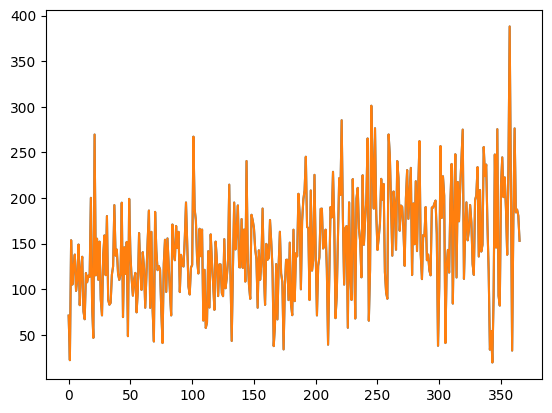

In [135]:
(Bcn_1d_old['Power_'+Bcn_stations[0]]/1000).plot()
(Bcn_1d_tosave['Power_'+Bcn_stations[0]]).plot()

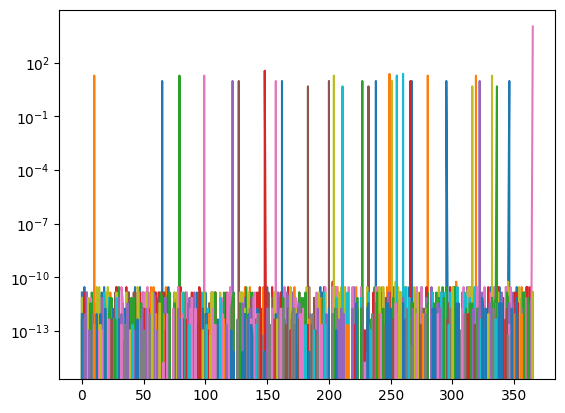

In [162]:
stat = ['Power_PdRR Cornellà de Llobregat: Carrer de Baltasar Oriol i Mercer']
stats = Bcn_1d_old.columns[1:]
plt.plot(Bcn_1d_tosave[stats].applymap(lambda x: x*1000) - Bcn_1d_old[stats])
plt.yscale('log',base=10) 

In [154]:
stats

Index(['Power_PdRR Gavà: C. del Progres, 54',
       'Power_PdRR Sant Cugat del Vallès: Av. Via Augusta, 3',
       'Power_PdRR Sant Joan Despi: C. TV3 - C. Jacint Verdaguer',
       'Power_PdRR El Prat de Llobregat: Pl. Volateria (Mas Blau)',
       'Power_PdRR Pallejà: Rda. Santa Eulalia - C. Joan Maragall',
       'Power_PdRR Barberà del Vallés: C. Arquímedes, 8',
       'Power_PdRR l'Hospitalet de Ll.: C. Salvador Espriu - Gran Via de les Corts Catalanes',
       'Power_PdRL Sant Joan Despí: C. TV3 - C. Jacint Verdaguer',
       'Power_PdRR Cornellà de Llobregat: Carrer de Baltasar Oriol i Mercer',
       'Power_PdRR Badalona: C. Anna Tugas - Pg. Olof Palmer',
       'Power_PdRL Pallejà: Rda. Santa Eulalia - C. Joan Maragall',
       'Power_PdRL Badalona: C. Anna Tugas - Pg. Olof Palmer',
       'Power_PdRR Montcada i Reixac: C. Tarragona - C. Pla de Matabous',
       'Power_PdRL Cornellà de Llobregat: Carrer de Baltasar Oriol i Mercer',
       'Power_PdRL Gavà: C. del Progres, 54'

Text(0.5, 1.0, 'Diferencia (Wh)')

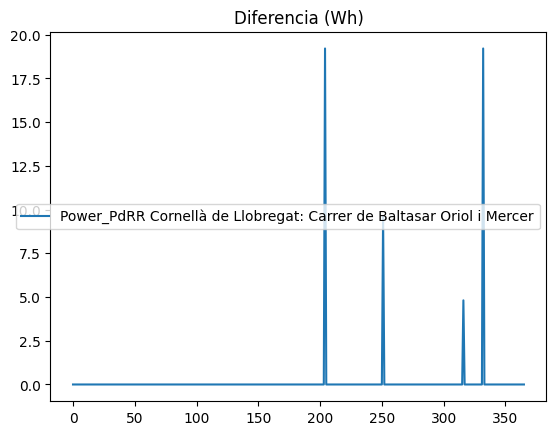

In [169]:
stat = ['Power_PdRR Cornellà de Llobregat: Carrer de Baltasar Oriol i Mercer']
(Bcn_1d_tosave[stat].applymap(lambda x: x*1000) - Bcn_1d_old[stat]).plot()
plt.title('Diferencia (Wh)')

Text(0.5, 1.0, 'Diferencia (Wh)')

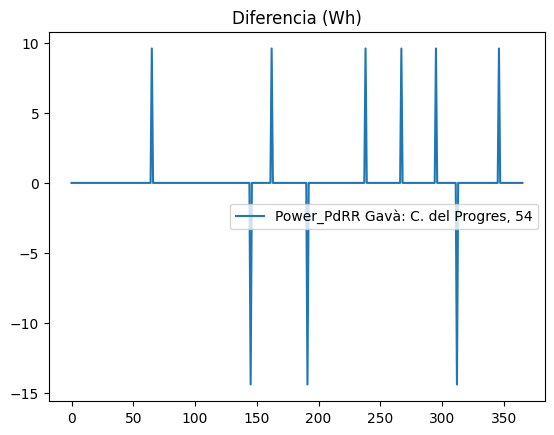

In [170]:
stat = ['Power_PdRR Gavà: C. del Progres, 54']
(Bcn_1d_tosave[stat].applymap(lambda x: x*1000) - Bcn_1d_old[stat]).plot()
plt.title('Diferencia (Wh)')